# metric

In [ ]:
import pandas as pd
import numpy as np

df_de=pd.read_csv('densenet_metrics_new.csv')
df_ef=pd.read_csv('efficientnet_metrics_new.csv')
df_re=pd.read_csv('resnet_metrics_new.csv')

In [ ]:
df_all=pd.concat([df_de,df_ef,df_re])
df_all.head()

,filename,precision,recall,f1
0,de_sgd_b_met,0.9417,0.9898,0.9652
1,de_ada_re_b_met,0.9697,0.9796,0.9746
2,de_ada_re8_b_met,0.9700,0.9898,0.9798
3,de_sgd_cos_b_met,0.9604,0.9898,0.9749
4,de_sgd_cos10_b_met,0.9515,1.0000,0.9751


In [7]:
df_all=df_all.sort_values(by='f1',ascending=False).reset_index(drop=True)

In [8]:
df_all.to_csv('model_metrics.csv')

In [9]:
df_all

,filename,precision,recall,f1
0,de_ada_b_met,0.9897,0.9796,0.9846
1,de_ada_re8_b_met,0.9700,0.9898,0.9798
2,de_ada7_b_met,0.9896,0.9694,0.9794
3,de_sgd_cos10_b_met,0.9515,1.0000,0.9751
4,res34_sgd_st_b_met,0.9604,0.9898,0.9749
5,de_sgd_cos_b_met,0.9604,0.9898,0.9749
6,res34_sgd_st9_b_met,0.9604,0.9898,0.9749
7,de_ada_re_b_met,0.9697,0.9796,0.9746
8,res18_ada_re10_b_met,0.9600,0.9796,0.9697
9,eff_ada5_b_met,0.9600,0.9796,0.9697


# 그래프_densenet

In [ ]:
import torch

def load_graph(load_path,device):
    checkpoint = torch.load(load_path,map_location=device)

    train_losses = checkpoint.get('train_losses', [])
    val_losses = checkpoint.get('val_losses', [])
    train_accuracies = checkpoint.get('train_accuracies', [])
    val_accuracies = checkpoint.get('val_accuracies', [])

    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
de_ada_re_train_loss, de_ada_re_val_loss, de_ada_re_train_acc, de_ada_re_val_acc=load_graph('de_ada_re_b.pth',device)
de_ada_train_loss, de_ada_val_loss, de_ada_train_acc, de_ada_val_acc = load_graph('de_ada_b.pth',device)
de_sgd_train_loss, de_sgd_val_loss, de_sgd_train_acc, de_sgd_val_acc = load_graph('de_sgd_b.pth',device)
de_sgd_cos_train_loss, de_sgd_cos_val_loss, de_sgd_cos_train_acc, de_sgd_cos_val_acc = load_graph('de_sgd_cos_b.pth',device)

<ipython-input-2-7e12ceeffab0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(load_path,map_location=device)


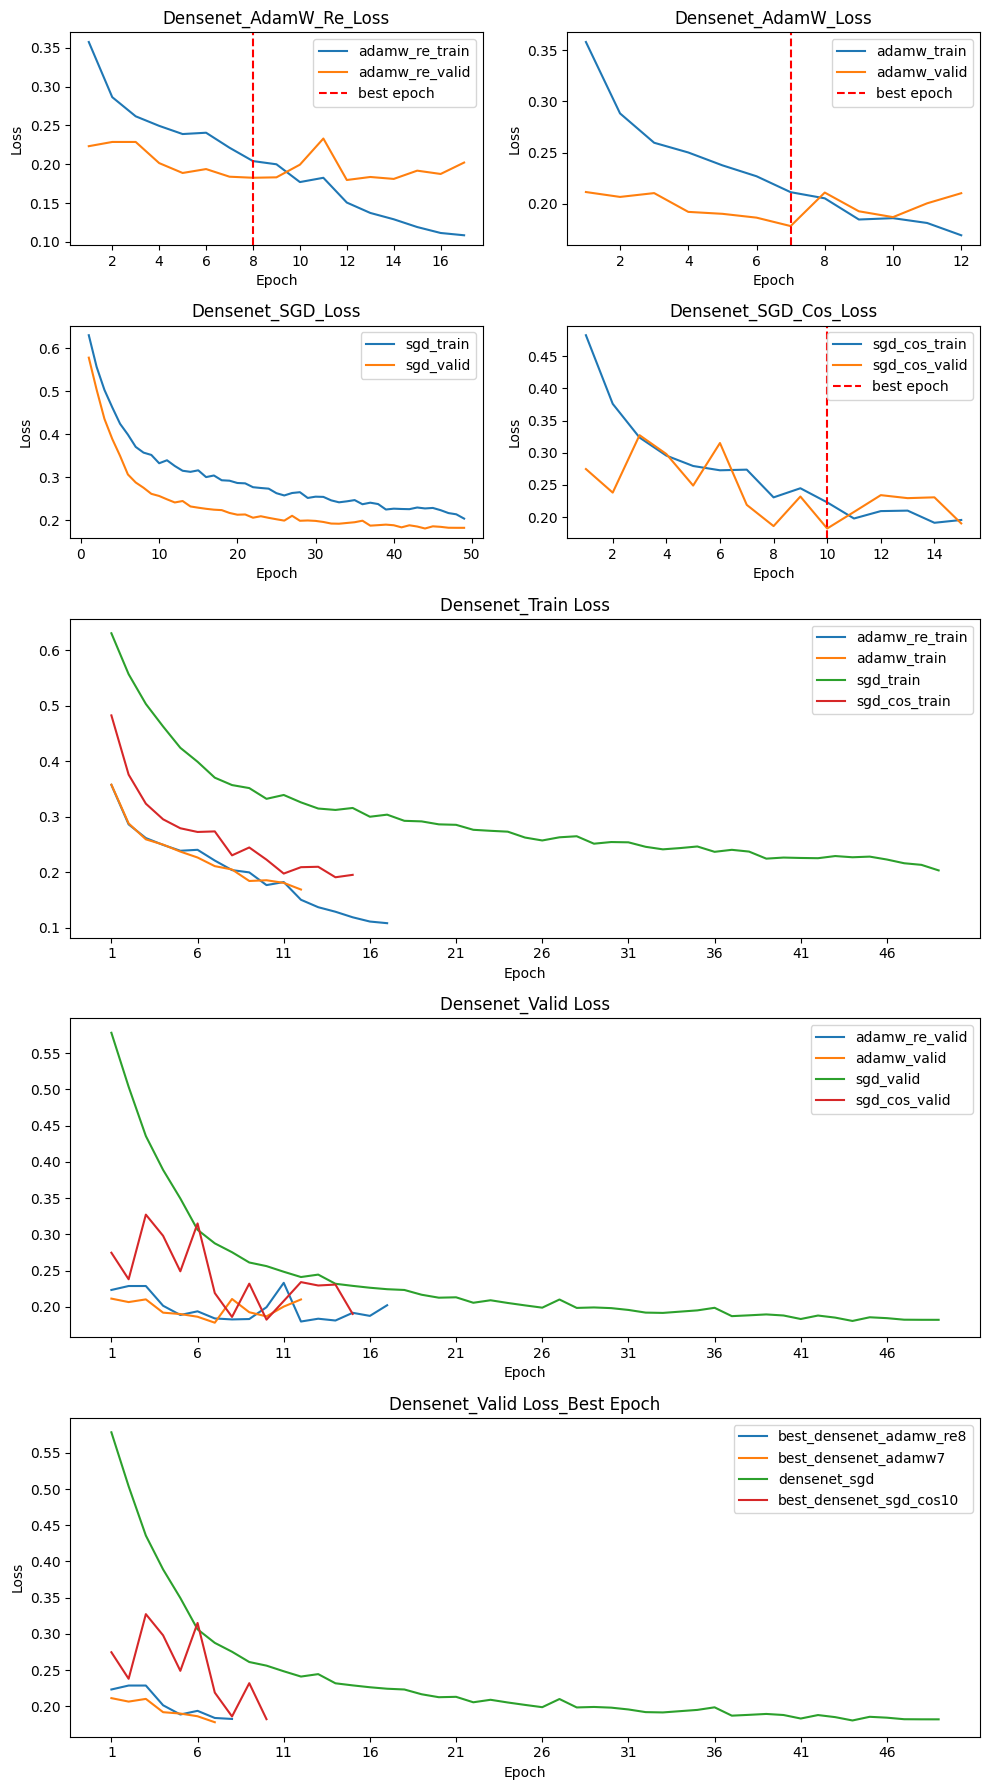

In [ ]:
from re import A
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

tr=[de_ada_re_train_loss,de_ada_train_loss,de_sgd_train_loss,de_sgd_cos_train_loss]
va=[de_ada_re_val_loss,de_ada_val_loss,de_sgd_val_loss,de_sgd_cos_val_loss]
tr_l=['adamw_re_train','adamw_train','sgd_train','sgd_cos_train']
va_l=['adamw_re_valid','adamw_valid','sgd_valid','sgd_cos_valid']
l=['Densenet_AdamW_Re_Loss','Densenet_AdamW_Loss','Densenet_SGD_Loss','Densenet_SGD_Cos_Loss']

fig=plt.figure(figsize=(10, 18))

gs = GridSpec(5, 2, fig, height_ratios=[1, 1, 1.5, 1.5, 1.5])
x = np.arange(len(de_sgd_train_loss))
tick_labels = np.arange(1, len(de_sgd_train_loss), 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])
ax7 = fig.add_subplot(gs[4, :])
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i in range(6):
  if i<4:
    axes[i].plot(range(1, len(tr[i]) + 1),tr[i],label=tr_l[i])
    axes[i].plot(range(1, len(va[i]) + 1),va[i],label=va_l[i])
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].set_title(l[i])
  elif i==4:
    for j in range(4):
      axes[i].plot(x[:len(tr[j])],tr[j],label=tr_l[j])
      axes[i].set_xlabel('Epoch')
      axes[i].set_ylabel=('Loss')
      axes[i].set_title('Densenet_Train Loss')
    axes[i].set_xticks(ticks=np.arange(0, len(de_sgd_train_loss), 5),labels=np.arange(1,len(de_sgd_train_loss),5))
  else:
    for j in range(4):
      axes[i].plot(x[:len(va[j])],va[j],label=va_l[j])
      axes[i].set_xlabel('Epoch')
      axes[i].set_ylabel=('Loss')
      axes[i].set_title('Densenet_Valid Loss')
    axes[i].set_xticks(ticks=np.arange(0, len(de_sgd_train_loss), 5),labels=np.arange(1,len(de_sgd_train_loss),5))

axes[6].plot(x[:8],de_ada_re_val_loss[:8],label='best_densenet_adamw_re8')
axes[6].plot(x[:7],de_ada_val_loss[:7],label='best_densenet_adamw7')
axes[6].plot(x,de_sgd_val_loss,label='densenet_sgd')
axes[6].plot(x[:10],de_sgd_cos_val_loss[:10],label='best_densenet_sgd_cos10')

axes[6].set_xlabel('Epoch')
axes[6].set_ylabel('Loss')
axes[6].set_title('Densenet_Valid Loss_Best Epoch')
axes[6].set_xticks(ticks=np.arange(0, len(de_sgd_train_loss), 5),labels=np.arange(1,len(de_sgd_train_loss),5))

axes[0].axvline(x=8,color='red',linestyle='--',label='best epoch')
axes[1].axvline(x=7,color='red',linestyle='--',label='best epoch')
axes[3].axvline(x=10,color='red',linestyle='--',label='best epoch')
for ax in axes:
  ax.legend()

plt.tight_layout()
plt.show()

# 그래프_efficientnetb0

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
eff_ada_re_train_loss, eff_ada_re_val_loss, eff_ada_re_train_acc, eff_ada_re_val_acc=load_graph('eff_ada_re_b.pth',device)
eff_ada_train_loss, eff_ada_val_loss, eff_ada_train_acc, eff_ada_val_acc = load_graph('eff_ada_b.pth',device)
eff_sgd_train_loss, eff_sgd_val_loss, eff_sgd_train_acc, eff_sgd_val_acc = load_graph('eff_sgd_b.pth',device)
eff_sgd_cos_train_loss, eff_sgd_cos_val_loss, eff_sgd_cos_train_acc, eff_sgd_cos_val_acc = load_graph('eff_sgd_cos_b.pth',device)

<ipython-input-2-7e12ceeffab0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(load_path,map_location=device)


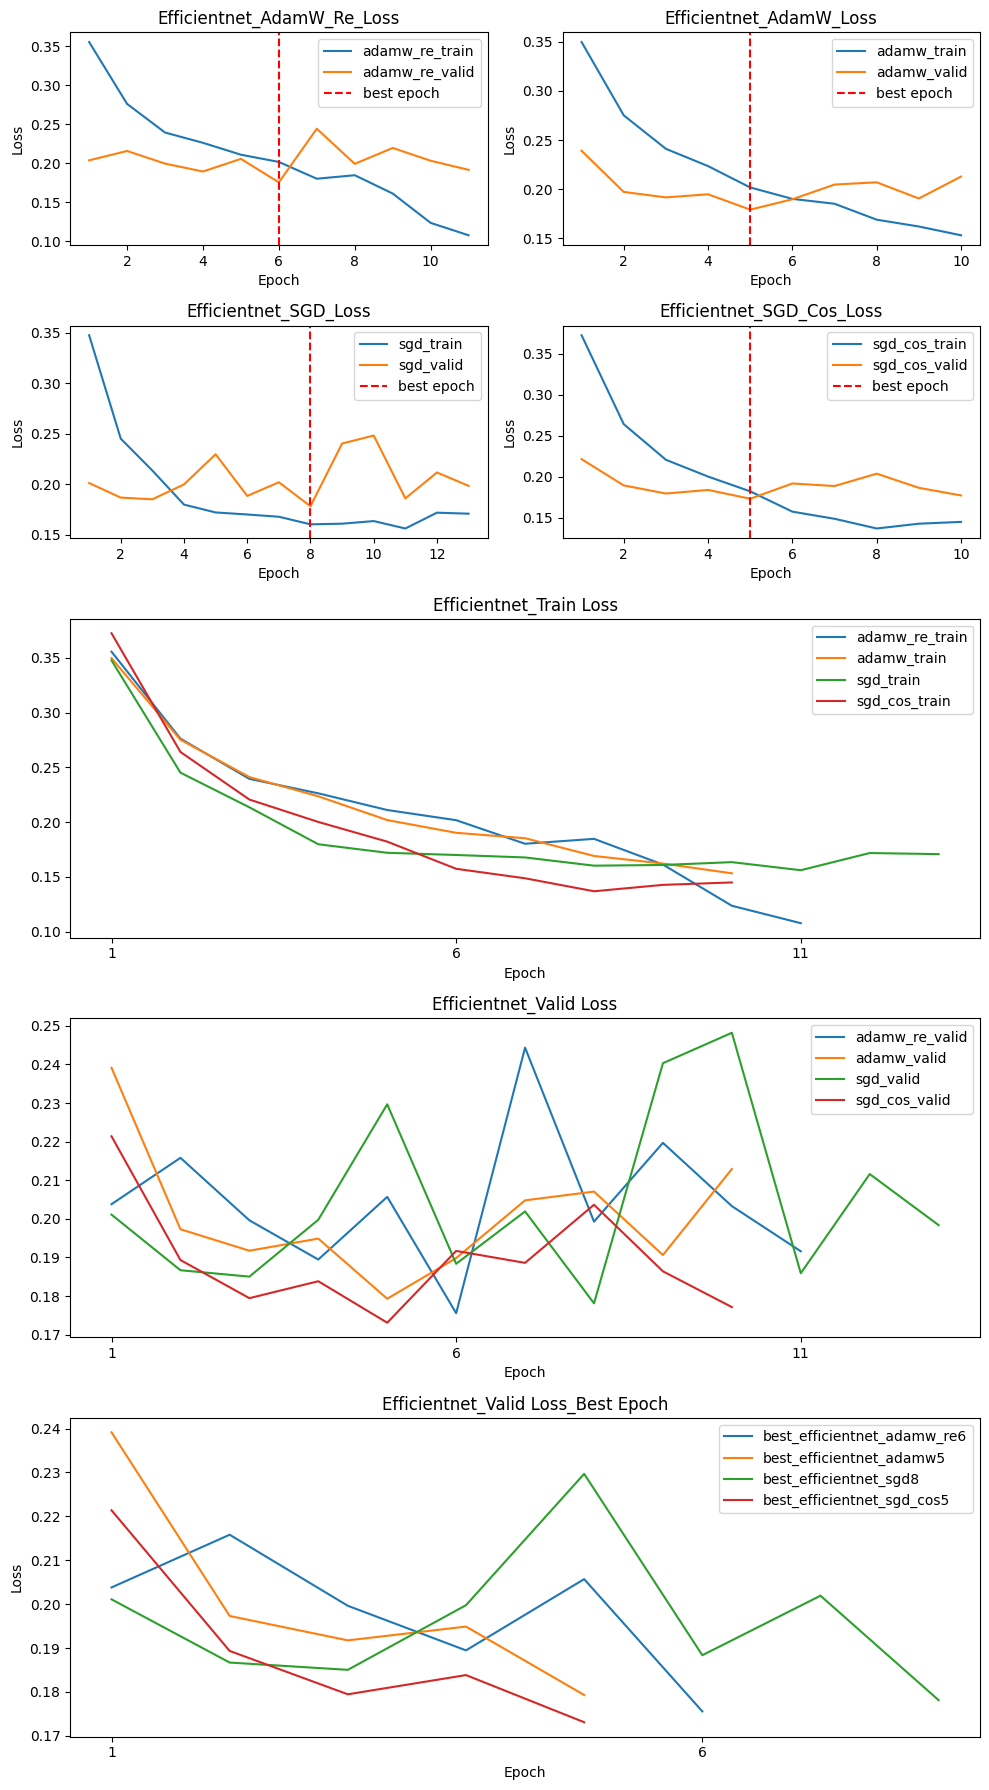

In [ ]:
from re import A
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

tr=[eff_ada_re_train_loss,eff_ada_train_loss,eff_sgd_train_loss,eff_sgd_cos_train_loss]
va=[eff_ada_re_val_loss,eff_ada_val_loss,eff_sgd_val_loss,eff_sgd_cos_val_loss]
tr_l=['adamw_re_train','adamw_train','sgd_train','sgd_cos_train']
va_l=['adamw_re_valid','adamw_valid','sgd_valid','sgd_cos_valid']
l=['Efficientnet_AdamW_Re_Loss','Efficientnet_AdamW_Loss','Efficientnet_SGD_Loss','Efficientnet_SGD_Cos_Loss']

fig=plt.figure(figsize=(10, 18))

gs = GridSpec(5, 2, fig, height_ratios=[1, 1, 1.5, 1.5, 1.5])
x = np.arange(len(eff_sgd_train_loss))
tick_labels = np.arange(1, len(eff_sgd_train_loss), 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])
ax7 = fig.add_subplot(gs[4, :])
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i in range(6):
  if i<4:
    axes[i].plot(range(1, len(tr[i]) + 1),tr[i],label=tr_l[i])
    axes[i].plot(range(1, len(va[i]) + 1),va[i],label=va_l[i])
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].set_title(l[i])
  elif i==4:
    for j in range(4):
      axes[i].plot(x[:len(tr[j])],tr[j],label=tr_l[j])
      axes[i].set_xlabel('Epoch')
      axes[i].set_ylabel=('Loss')
      axes[i].set_title('Efficientnet_Train Loss')
    axes[i].set_xticks(ticks=np.arange(0, len(eff_sgd_train_loss), 5),labels=np.arange(1,len(eff_sgd_train_loss),5))
  else:
    for j in range(4):
      axes[i].plot(x[:len(va[j])],va[j],label=va_l[j])
      axes[i].set_xlabel('Epoch')
      axes[i].set_ylabel=('Loss')
      axes[i].set_title('Efficientnet_Valid Loss')
    axes[i].set_xticks(ticks=np.arange(0, len(eff_sgd_train_loss), 5),labels=np.arange(1,len(eff_sgd_train_loss),5))

axes[6].plot(x[:6],eff_ada_re_val_loss[:6],label='best_efficientnet_adamw_re6')
axes[6].plot(x[:5],eff_ada_val_loss[:5],label='best_efficientnet_adamw5')
axes[6].plot(x[:8],eff_sgd_val_loss[:8],label='best_efficientnet_sgd8')
axes[6].plot(x[:5],eff_sgd_cos_val_loss[:5],label='best_efficientnet_sgd_cos5')

axes[6].set_xlabel('Epoch')
axes[6].set_ylabel('Loss')
axes[6].set_title('Efficientnet_Valid Loss_Best Epoch')
axes[6].set_xticks(ticks=np.arange(0, 10, 5),labels=np.arange(1,10,5))

axes[0].axvline(x=6,color='red',linestyle='--',label='best epoch')
axes[1].axvline(x=5,color='red',linestyle='--',label='best epoch')
axes[2].axvline(x=8,color='red',linestyle='--',label='best epoch')
axes[3].axvline(x=5,color='red',linestyle='--',label='best epoch')
for ax in axes:
  ax.legend()

plt.tight_layout()
plt.show()

# 그래프_resnet

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
res18_ada_re_train_loss, res18_ada_re_val_loss, res18_ada_re_train_acc, res18_ada_re_val_acc=load_graph('res18_ada_re_b.pth',device)
res18_sgd_cos_train_loss, res18_sgd_cos_val_loss, res18_sgd_cos_train_acc, res18_sgd_cos_val_acc = load_graph('res18_sgd_cos_b.pth',device)
res34_ada_re_train_loss, res34_ada_re_val_loss, res34_ada_re_train_acc, res34_ada_re_val_acc=load_graph('res34_ada_re_b.pth',device)
res34_sgd_train_loss, res34_sgd_val_loss, res34_sgd_train_acc, res34_sgd_val_acc = load_graph('res34_sgd_b.pth',device)
res34_sgd_cos_train_loss, res34_sgd_cos_val_loss, res34_sgd_cos_train_acc, res34_sgd_cos_val_acc = load_graph('res34_sgd_cos_b.pth',device)
res34_sgd_st_train_loss, res34_sgd_st_val_loss, res34_sgd_st_train_acc, res34_sgd_st_val_acc = load_graph('res34_sgd_st_b.pth',device)

<ipython-input-2-7e12ceeffab0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(load_path,map_location=device)


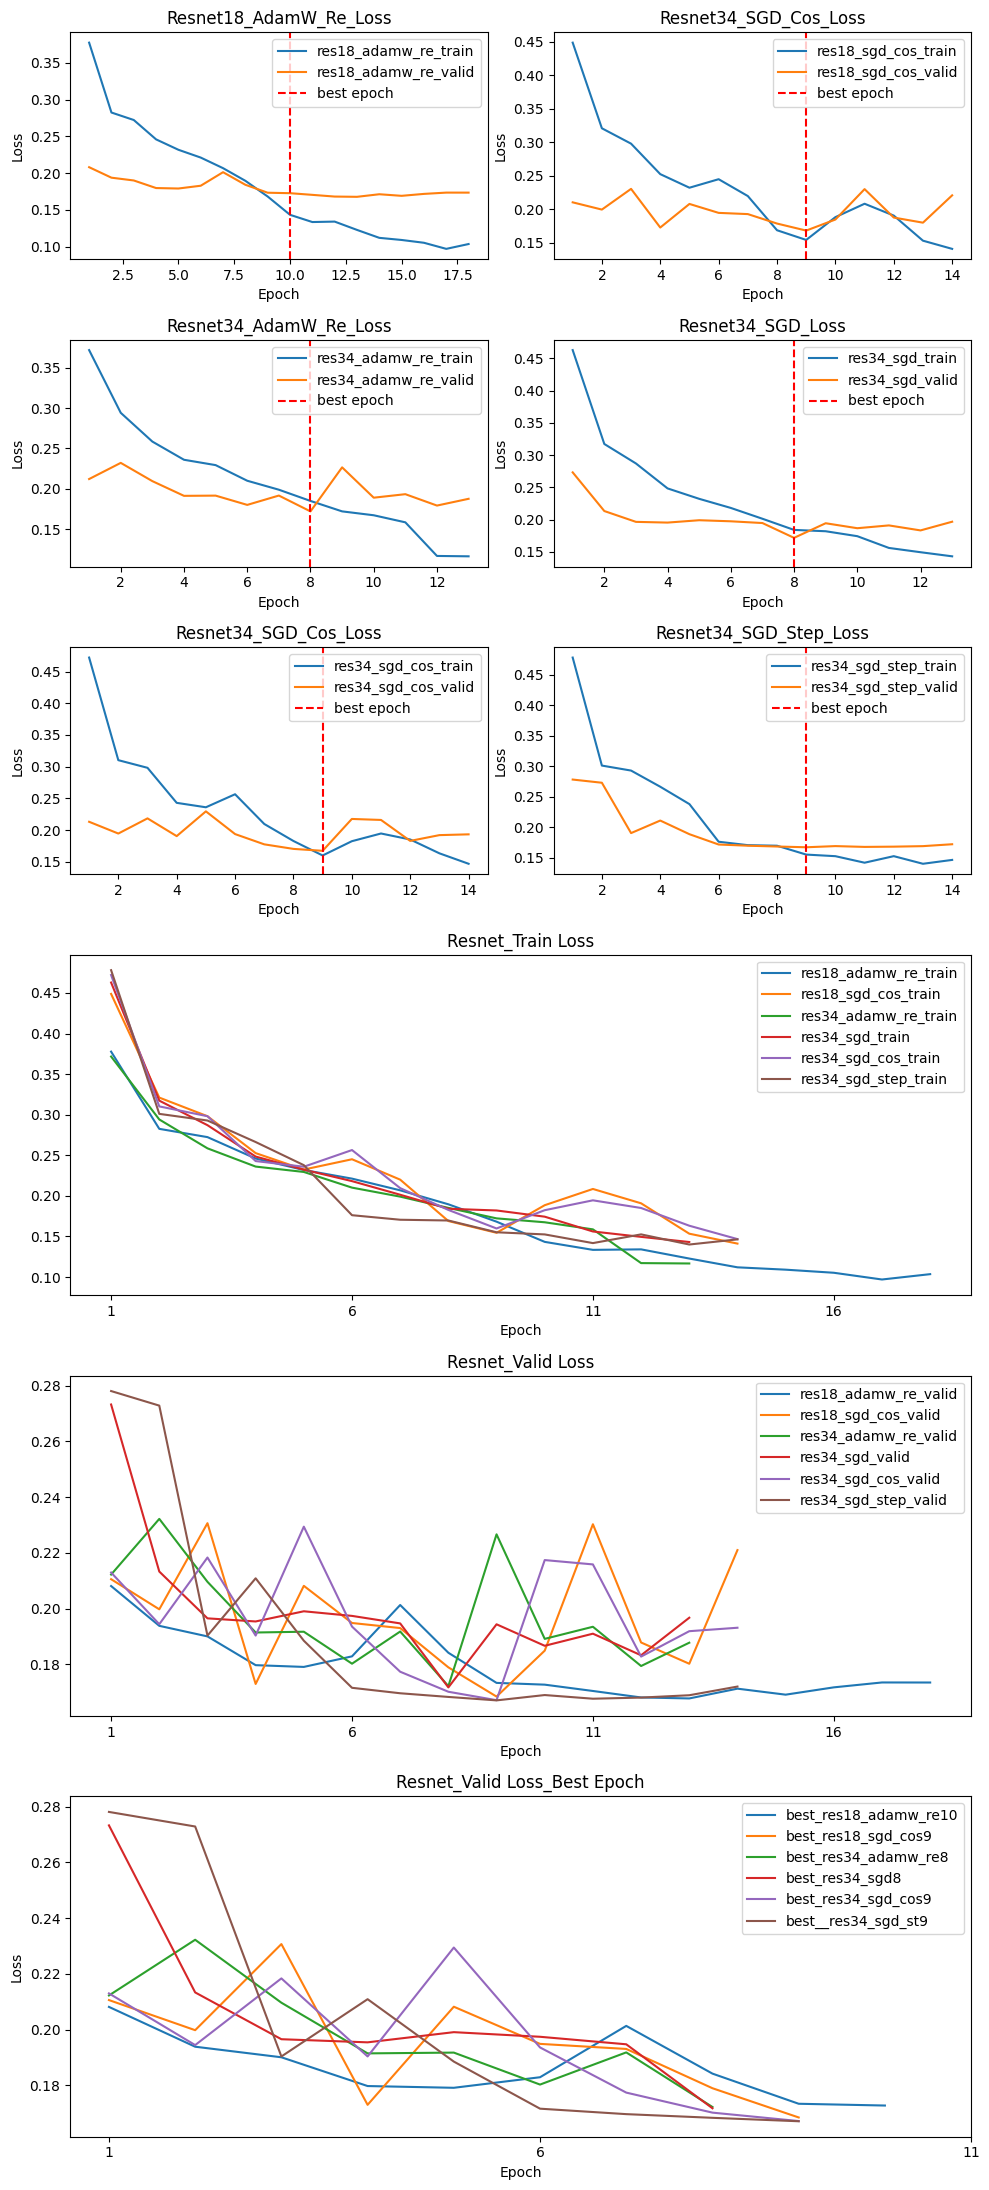

In [ ]:
from re import A
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

tr=[res18_ada_re_train_loss,res18_sgd_cos_train_loss,res34_ada_re_train_loss,res34_sgd_train_loss,res34_sgd_cos_train_loss,res34_sgd_st_train_loss]
va=[res18_ada_re_val_loss,res18_sgd_cos_val_loss,res34_ada_re_val_loss,res34_sgd_val_loss,res34_sgd_cos_val_loss,res34_sgd_st_val_loss]
tr_l=['res18_adamw_re_train','res18_sgd_cos_train','res34_adamw_re_train','res34_sgd_train','res34_sgd_cos_train','res34_sgd_step_train']
va_l=['res18_adamw_re_valid','res18_sgd_cos_valid','res34_adamw_re_valid','res34_sgd_valid','res34_sgd_cos_valid','res34_sgd_step_valid']
l=['Resnet18_AdamW_Re_Loss','Resnet34_SGD_Cos_Loss','Resnet34_AdamW_Re_Loss','Resnet34_SGD_Loss','Resnet34_SGD_Cos_Loss','Resnet34_SGD_Step_Loss']
fig=plt.figure(figsize=(10, 22))

gs = GridSpec(6, 2, fig, height_ratios=[1, 1, 1, 1.5, 1.5, 1.5])
x = np.arange(len(res18_ada_re_train_loss))
tick_labels = np.arange(1, len(res18_ada_re_train_loss), 1)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, :])
ax8 = fig.add_subplot(gs[4, :])
ax9 = fig.add_subplot(gs[5, :])
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in range(8):
  if i<6:
    axes[i].plot(range(1, len(tr[i]) + 1),tr[i],label=tr_l[i])
    axes[i].plot(range(1, len(va[i]) + 1),va[i],label=va_l[i])
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].set_title(l[i])
  elif i==6:
    for j in range(6):
      axes[i].plot(x[:len(tr[j])],tr[j],label=tr_l[j])
      axes[i].set_xlabel('Epoch')
      axes[i].set_ylabel=('Loss')
      axes[i].set_title('Resnet_Train Loss')
    axes[i].set_xticks(ticks=np.arange(0, len(res18_ada_re_train_loss), 5),labels=np.arange(1,len(res18_ada_re_train_loss),5))
  else:
    for j in range(6):
      axes[i].plot(x[:len(va[j])],va[j],label=va_l[j])
      axes[i].set_xlabel('Epoch')
      axes[i].set_ylabel=('Loss')
      axes[i].set_title('Resnet_Valid Loss')
    axes[i].set_xticks(ticks=np.arange(0, len(res18_ada_re_train_loss), 5),labels=np.arange(1,len(res18_ada_re_train_loss),5))

axes[8].plot(x[:10],res18_ada_re_val_loss[:10],label='best_res18_adamw_re10')
axes[8].plot(x[:9],res18_sgd_cos_val_loss[:9],label='best_res18_sgd_cos9')
axes[8].plot(x[:8],res34_ada_re_val_loss[:8],label='best_res34_adamw_re8')
axes[8].plot(x[:8],res34_sgd_val_loss[:8],label='best_res34_sgd8')
axes[8].plot(x[:9],res34_sgd_cos_val_loss[:9],label='best_res34_sgd_cos9')
axes[8].plot(x[:9],res34_sgd_st_val_loss[:9],label='best__res34_sgd_st9')

axes[8].set_xlabel('Epoch')
axes[8].set_ylabel('Loss')
axes[8].set_title('Resnet_Valid Loss_Best Epoch')
axes[8].set_xticks(ticks=np.arange(0, 12, 5),labels=np.arange(1,12,5))

axes[0].axvline(x=10,color='red',linestyle='--',label='best epoch')
axes[1].axvline(x=9,color='red',linestyle='--',label='best epoch')
axes[2].axvline(x=8,color='red',linestyle='--',label='best epoch')
axes[3].axvline(x=8,color='red',linestyle='--',label='best epoch')
axes[4].axvline(x=9,color='red',linestyle='--',label='best epoch')
axes[5].axvline(x=9,color='red',linestyle='--',label='best epoch')
for ax in axes:
  ax.legend()

plt.tight_layout()
plt.show()